# **Import Library**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = ('/content/drive/MyDrive/Machine Learning Basic/k-Nearest Neighbors/Data/breast-cancer-wisconsin.data.txt')

In [6]:
df = pd.read_csv(data, header=None)

# **Exploratory Data Analysis (EDA)**

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## **Rename Columns**

In [8]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [9]:
df.columns = col_names

In [11]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## **Drop Column**

In [12]:
df.drop('Id', axis=1, inplace=True) #because column Id is not usefull

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


**Note** :

Convert Bare_Nuclei into int64

In [14]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [15]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


## **Check Missing Values**

In [16]:
df.isna().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


**Note** :

Bare_Nuclei column has a 16 missing values.

# **Data Visualization**

### **Bar Plot each columns**

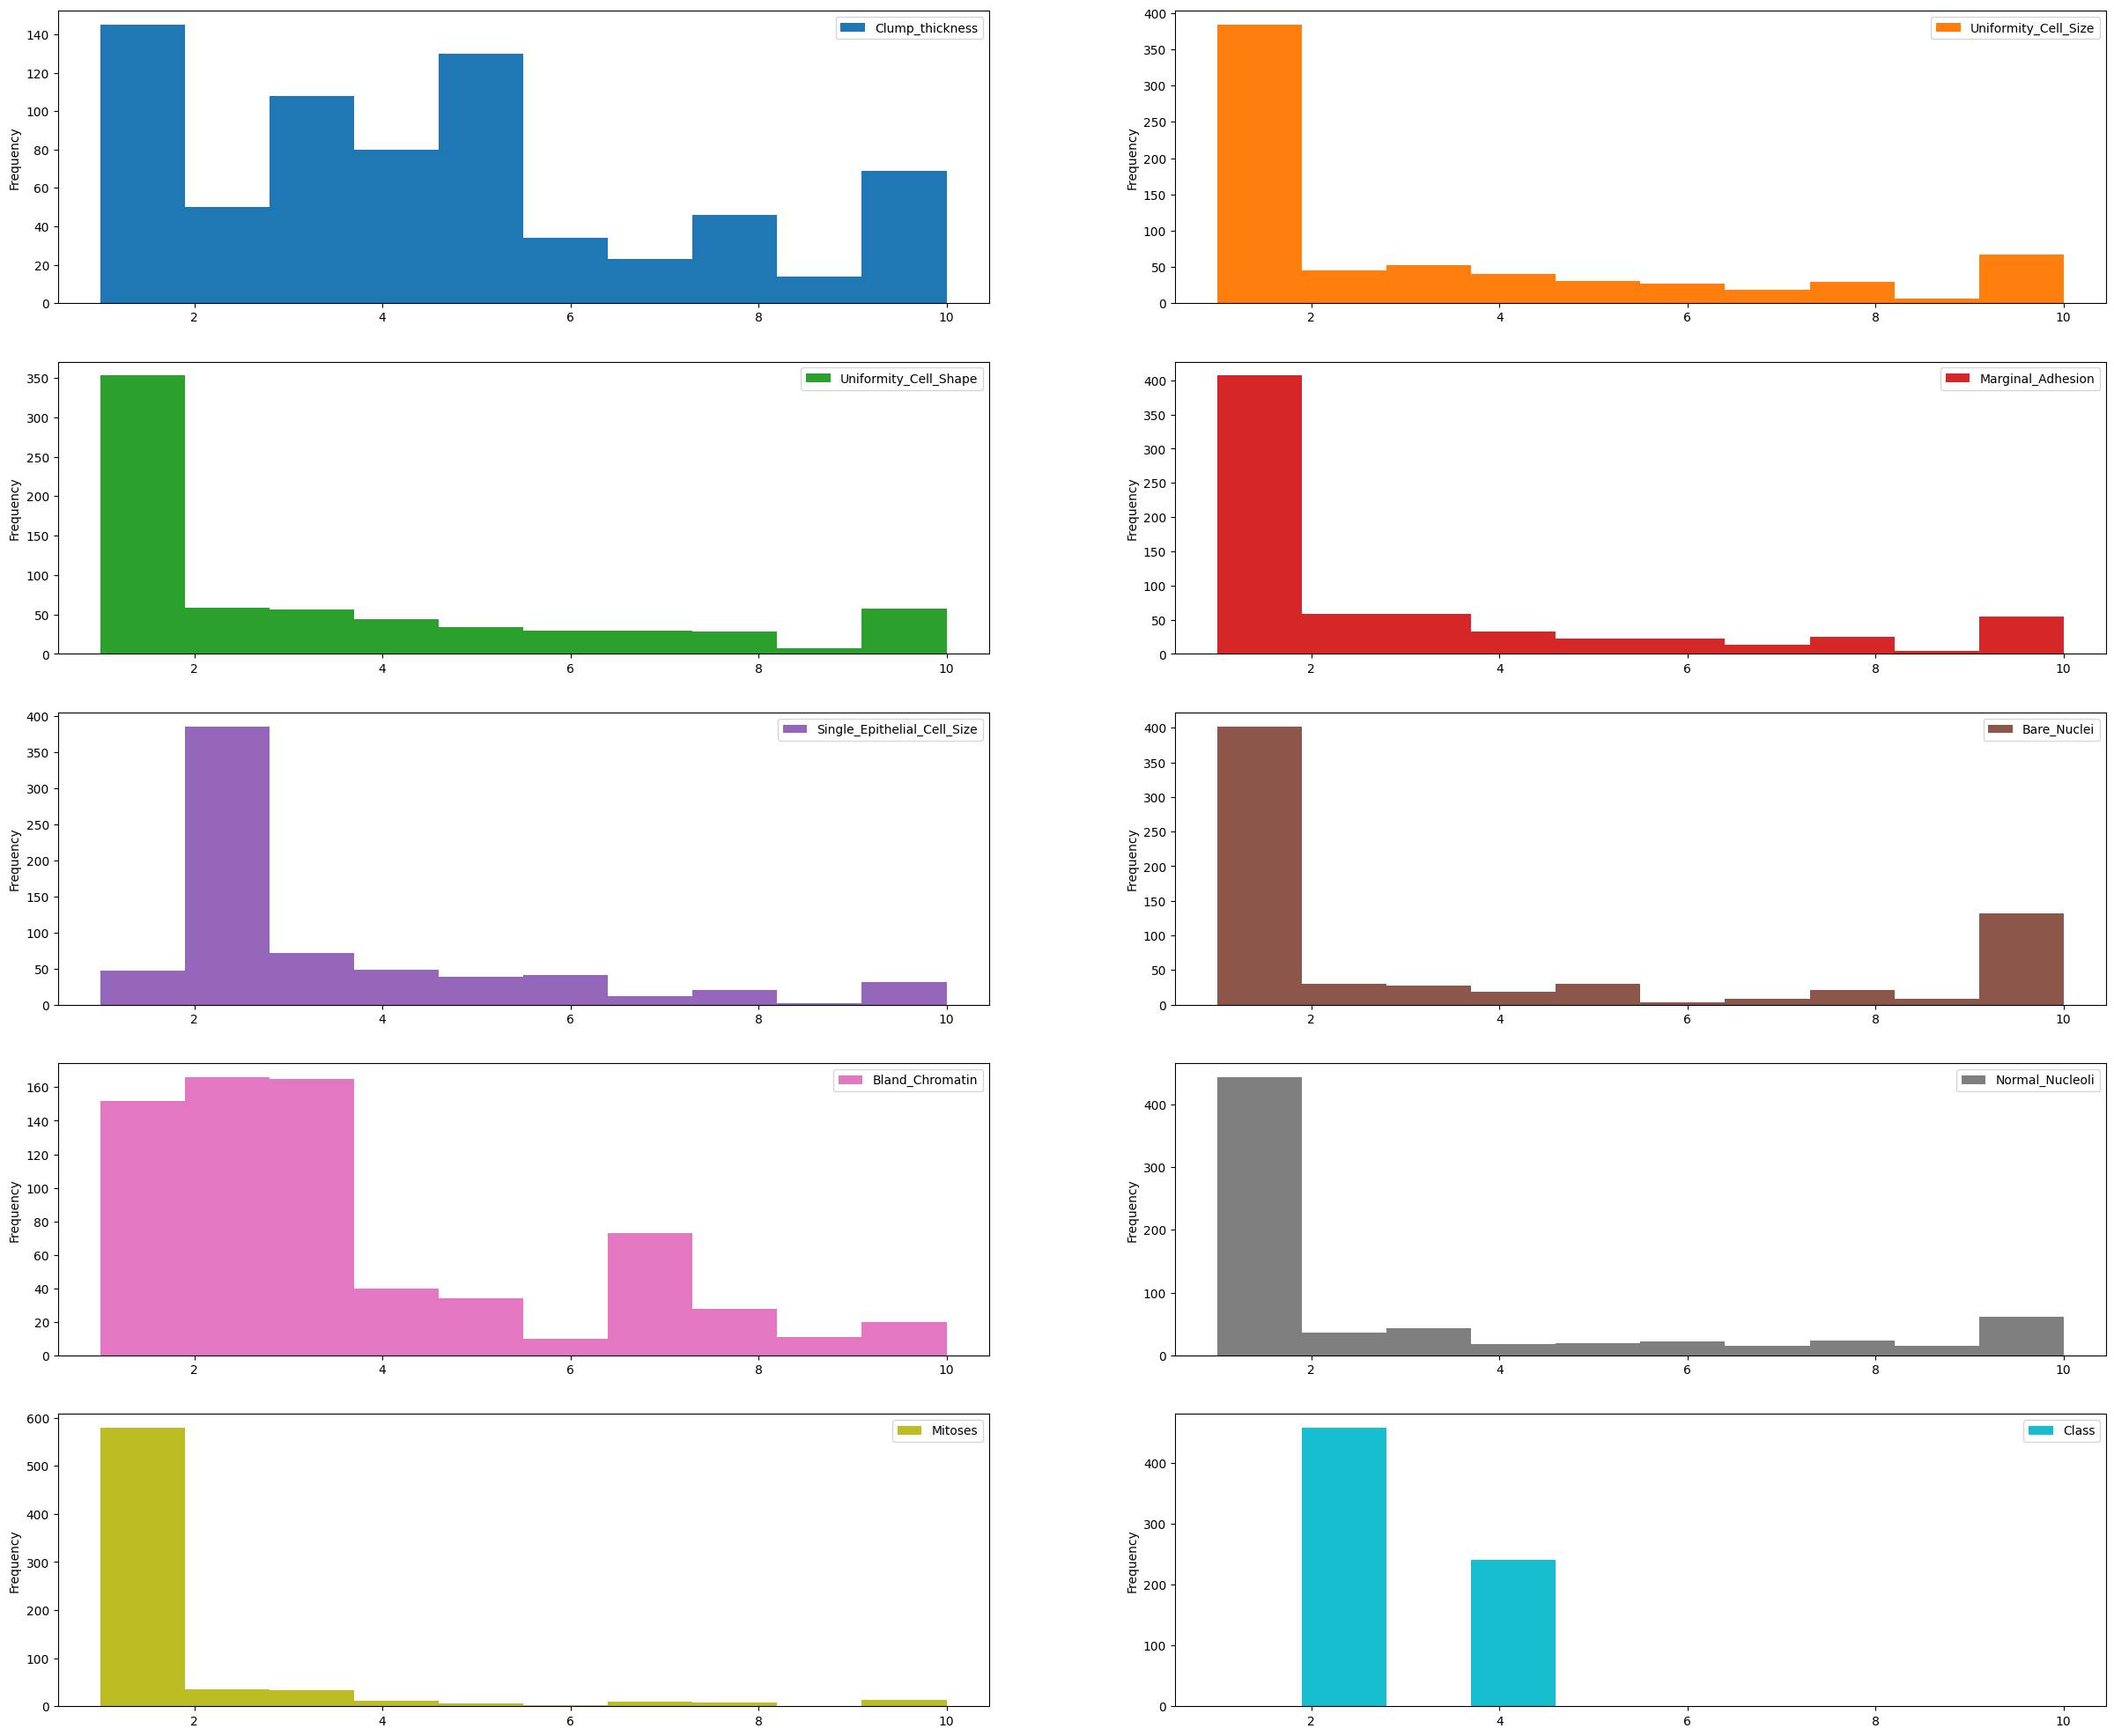

In [17]:
plt.rcParams['figure.figsize'] = (30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

### **Correlation Heat Map**

In [19]:
correlation = df.corr()

In [20]:
correlation['Class'].sort_values(ascending=False)

,Class
Class,1.000000
Bare_Nuclei,0.822696
Uniformity_Cell_Shape,0.818934
Uniformity_Cell_Size,0.817904
Bland_Chromatin,0.756616
Clump_thickness,0.716001
Normal_Nucleoli,0.712244
Marginal_Adhesion,0.696800
Single_Epithelial_Cell_Size,0.682785
Mitoses,0.423170


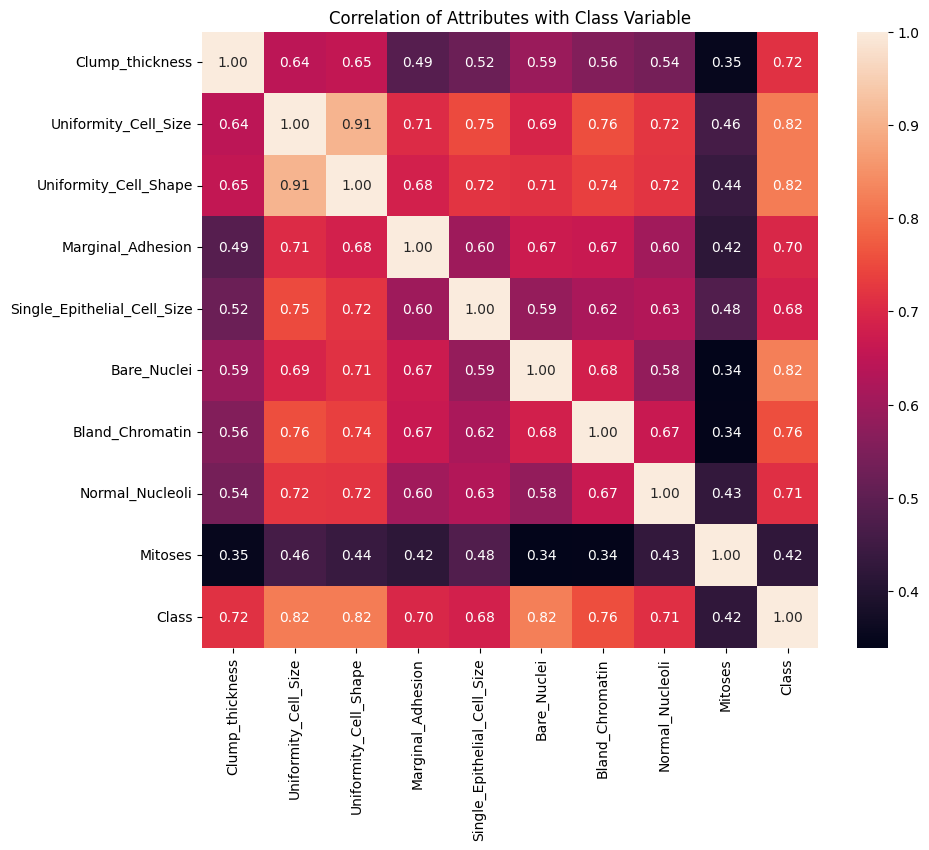

In [21]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of Attributes with Class Variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

# **Define Dependent and Independent Features**

In [22]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# **Data Splitting**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 9), (140, 9), (559,), (140,))

# **Feature Engineering**

In [27]:
X_train.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64


In [30]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,11
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [31]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,5
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [32]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

<ipython-input-32-7091275a5ccc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(col_median, inplace=True)


In [33]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [34]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


# **Feature Scaling**

In [35]:
cols = X_train.columns

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [40]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [41]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.164886,-0.383175,-0.760698,-0.642507,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
1,0.164886,-0.054655,-0.096276,0.405629,-0.554964,0.113334,-0.183205,0.392303,-0.349724
2,-1.236959,-0.711694,-0.760698,-0.293128,-0.554964,-0.698893,-0.183205,-0.601492,-0.349724
3,0.164886,-0.711694,-0.760698,-0.642507,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724
4,-0.886498,-0.711694,-0.096276,-0.293128,-0.554964,-0.698893,-0.586401,-0.601492,-0.349724


# **Create k-Nearest Neighbor Model**

In [42]:
kNN = KNeighborsClassifier(n_neighbors=3)

kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## **Predict test-set results**

In [43]:
y_pred = kNN.predict(X_test)
y_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2])

**Note** :

2 is for probability of benign cancer and 4 is for probability of malignant cancer.

## **Check Accuracy Score**

In [44]:
print('Accuracy Score : {0:0.4f}'. format(kNN.score(X_test, y_test)))

Accuracy Score : 0.9714


In [49]:
y_pred_train = kNN.predict(X_train)

print('Train-set Accuracy Score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Train-set Accuracy Score : 0.9803


# **Check Overfitting or Underfitting**

In [50]:
print('Train-set Score : {:.4f}'.format(kNN.score(X_train, y_train)))

print('Test-set Score : {:.4f}'.format(kNN.score(X_test, y_test)))

Train-set Score : 0.9803
Test-set Score : 0.9714


# **Check Model Accuracy with Null Accuracy**

In [51]:
y_test.value_counts()

,count
Class,
2,95
4,45


In [52]:
#check null accuracy score

null_accuracy = (95/(95+45))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6786


# **Confusion Matrix**

In [53]:
cm = confusion_matrix(y_test, y_pred)

In [54]:
print('Confusion Matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[94  1]
 [ 3 42]]

True Positives(TP) =  94

True Negatives(TN) =  42

False Positives(FP) =  1

False Negatives(FN) =  3


<Axes: >

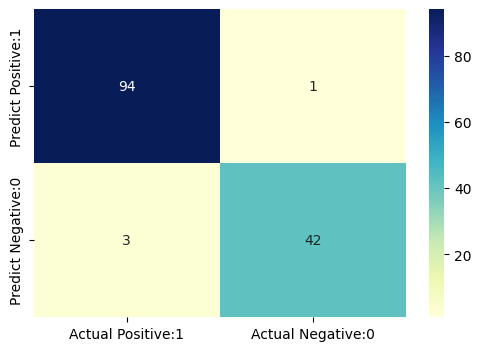

In [56]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Classification Report**

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

